# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

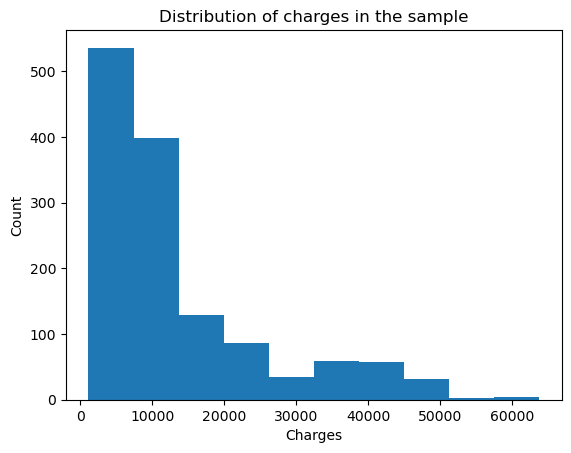

In [4]:
_ = plt.hist(medical.charges)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of charges in the sample')

In [5]:
# The mean of the sample
sample_mean = np.mean(medical.charges)
print('The mean of the sample from our hospital: {:,.2f}'.format(sample_mean))

# The standard deviation of the sample
std_of_sample = np.std(medical.charges)
print('The standard deviation of the sample: {:,.2f}'.format(std_of_sample))

# The sample standard deviation
sample_std = np.std(medical.charges, ddof=1)
print('The sample standard deviation (the aproximation of the population standard deviation): {:,.2f}'.format(sample_std))

The mean of the sample from our hospital: 13,270.42
The standard deviation of the sample: 12,105.48
The sample standard deviation (the aproximation of the population standard deviation): 12,110.01


__A:__ 
1.	The mean of the sample can serve as an estimate of the population mean.
2.	The standard deviation of the sample only reflects the variability within the sample and cannot be used to estimate the population standard deviation because it underestimates the population’s variability.
3.	The sample standard deviation provides an approximate estimate of the population standard deviation.

We observe that the standard deviation of the sample is smaller than the sample standard deviation, which is an approximation of the population standard deviation.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
To justify that the data allow me to answer the question about the probability of the actual average charge falling below 12,000, I would refer to the fact that this data represents a random sample of charges with a total size of 1,338 records, which satisfies the assumptions of the Central Limit Theorem. Therefore, we can use frequentist tests based on the Central Limit Theorem, which states that the distributions of sample statistics approach a normal distribution as the number of observations increases.

In my opinion, the most appropriate frequentist test in this case is the test for the probability that the population parameter (the actual average charge) is less than 12,000. I believe that this test should be conducted using the t-distribution because we do not know the population standard deviation and can only estimate it using the sample standard deviation.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Considering that the administrator is only concerned with the probability that the actual charge is below 12,000, the appropriate confidence interval is a one-sided interval with a lower limit of 5% probability.

In [6]:
n = medical.shape[0]
critical_value = t.ppf(0.05, n - 1, loc = sample_mean, scale = sample_std / np.sqrt(n))
print('The critical value at 95% confidence for the actual average charge being not less than is: {:,.2f}'.format(critical_value))
print('The 95% confidence interval for the average charge is [{:.2f}, +oo).'.format(critical_value))
print('The probability that the actual average charge is less than 12,000, given the sample we have, is {:.3%}'
      .format(t.cdf(12000, n - 1, loc = sample_mean, scale = sample_std / np.sqrt(n))))

The critical value at 95% confidence for the actual average charge being not less than is: 12,725.49
The 95% confidence interval for the average charge is [12725.49, +oo).
The probability that the actual average charge is less than 12,000, given the sample we have, is 0.007%


The critical value at 95% confidence for the actual average charge, based on the sample data, is 12,725. The probability that the actual average charge is less than 12,000 is nearly 0%. Therefore, the administrator has no reason for concern.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
My null hypothesis is that both groups (people with and without insurance) are charged the same amount.
The alternative hypothesis is that these amounts are not the same.

The main assumption about the variances of the two groups is that **they are equal**.

However, there are several other important assumptions for a valid test:  
1.	Each group must be obtained through random sampling from the population.
2.	The variables representing each group should be continuous and normally distributed.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [7]:
# Getting two groups
ins_charges = medical[medical['insuranceclaim'] == True].charges
no_ins_charges = medical[medical['insuranceclaim'] == False].charges

# Number of observations with/without insurance claim
n_ins = len(ins_charges)
n_no_ins = len(no_ins_charges)

# Mean charge for people with/without insurance claim
m_ins = ins_charges.mean()
m_no_ins = no_ins_charges.mean()

# Sample standard deviation for charges for group with/without insurance claim
s_ins = ins_charges.std()
s_no_ins = no_ins_charges.std()

In [8]:
# The standard deviation of the two groups
s_p = np.sqrt(((n_ins - 1) * (s_ins ** 2) + (n_no_ins - 1) * (s_no_ins ** 2)) /
              (n_ins + n_no_ins - 2))

In [9]:
# The t-test statistic and corresponding p-value:
t_value = (m_ins - m_no_ins) / (s_p * np.sqrt((1 / n_ins) + (1 / n_no_ins)))
p_value = t.sf(t_value, n_ins + n_no_ins - 2) * 2

print('t-statistic = {:f}, p-value = {:e}'.format(t_value, p_value))

t-statistic = 11.893299, p-value = 4.461230e-31


In [10]:
from scipy import stats

stats.ttest_ind(ins_charges, no_ins_charges)

TtestResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31, df=1336.0)

Following the results above we can reject our null hyputhesis that both groups (people with and without insurance) are charged the same amount.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
There is no z-test for a sample function equivalent to the t-test for a sample in scipy.stats. Although the z-test exists in theory and can provide more precise results, in practice it is often difficult to use because we must know the population standard deviation, which is rarely available.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test